In [1]:
from math import ceil
import sys
from matplotlib.axes import Axes
from matplotlib.colors import Normalize
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from pathlib import Path
import math

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

current_folder = globals()['_dh'][0]
sys.path.append(str(Path(current_folder,'..').resolve()))

from ModelTools.Utils import load_generate_all_csvs
from CustomEnvs.Indexes import OBS_INDEX
from CustomEnvs.CarParking import calculate_reward
from PostProcessing.Utils import MAP_BOUNDARY
import MJCFGenerator.Config as mjcf_cfg
import PathsConfig as paths_cfg

pygame 2.5.2 (SDL 2.28.3, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plot_terminal_positions(df, ax):
    grouped = df.groupby(by=["episode","env"])[['pos_X','pos_Y']].last()

    x = df['pos_X']
    y = df['pos_Y']
    
    x_terminal = grouped['pos_X']
    y_terminal = grouped['pos_Y']

    ax.set_xlim(MAP_BOUNDARY[0])
    ax.set_ylim(MAP_BOUNDARY[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

    ax.scatter(x,y, alpha=0.4, s=1)
    ax.scatter(x_terminal, y_terminal, alpha=0.1,color="green")
    # ax.legend()

In [3]:
%%capture --no-display

dfs = load_generate_all_csvs(overwrite=True)

d:\kody\rl_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\kody\rl_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\kody\rl_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


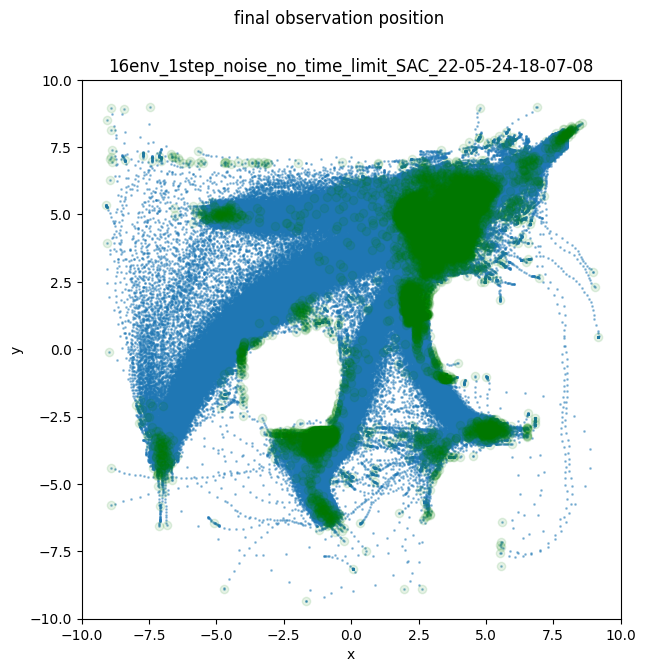

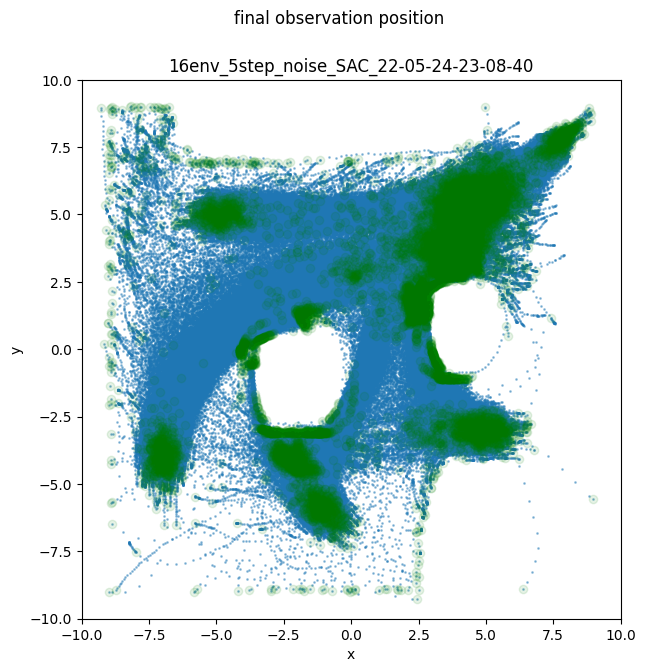

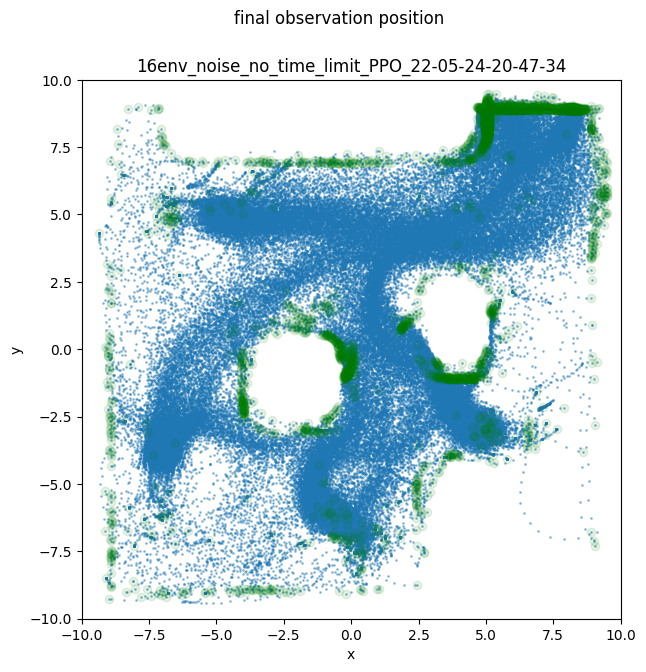

In [4]:
for dir, (df_episodes_all, df_episodes_summary, df_training_stats) in dfs.items():
    fig, axs = plt.subplots(1,1, figsize=(10,7))
    plot_terminal_positions(df_episodes_all, axs)
    fig.suptitle("final observation position")
    axs.set_title(Path(dir).stem)
